In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from google.colab import drive
from sklearn.svm import NuSVC, SVC

In [2]:
def correlation_matrix(self) -> None:    # Строит стандартную корреляционную матрицу
    plt.subplots(figsize=(10, 8))
    sns.heatmap(self.corr(), cmap='RdBu', annot=True, fmt=".2f", annot_kws={"size": 10, "ha": "center", "va": "center"})
    plt.xticks(range(len(self.corr().columns)), self.corr().columns);
    plt.yticks(range(len(self.corr().columns)), self.corr().columns)
    plt.title("Корреляционная матрица", fontsize=16)
    plt.show()

def compare_plot(self, column_x: int, column_y: int) -> None:   # Строит график зависимости по 2 параметрам. Ввод по индексу сравниваемых колонок
    plt.figure(figsize=(8, 6))
    title_x = self.columns[column_x]
    title_y = self.columns[column_y]
    plt.title("{} vs. \n{}".format(title_x, title_y), fontsize=13)
    sns.regplot(x=self[title_x], y=self[title_y])
    plt.grid(True)
    plt.xlabel(title_x, fontsize=11)
    plt.ylabel(title_y, fontsize=11)
    plt.show()

def compare_plots_to_parametr_row(self, column_y: int) -> None:
    num_plots = len(self.columns)
    ncols = 4
    nrows = (num_plots + ncols - 1) // ncols

    plt.figure(figsize=(ncols * 4, nrows * 3))

    for idx, i in enumerate(self.columns[:-1]):
        plt.subplot(nrows, ncols, idx + 1)
        title_y = self.columns[column_y]
        plt.title("{} vs. \n{}".format(i, title_y), fontsize=13)
        sns.regplot(x=self[i], y=self[title_y])
        plt.grid(True)
        plt.xlabel(i, fontsize=11)
        plt.ylabel(title_y, fontsize=11)

    plt.tight_layout()
    plt.show()

def compare_plots_to_parametr(self, column_y: int) -> None:    # Строит графики зависимости по всем параметрам с привязкой к column_y (индекс)
    for i in self.columns[:-1]:
      plt.figure(figsize=(8, 6))
      title_y = self.columns[column_y]
      plt.title("{} vs. \n{}".format(i, title_y), fontsize=13)
      sns.regplot(x=self[i], y=self[title_y])
      plt.grid(True)
      plt.xlabel(i, fontsize=11)
      plt.ylabel(title_y, fontsize=11)
      plt.show()

def top_correlations(self, top_n: int) -> None:        # Выводит top_n корреляционных пар
    correlation_matrix = self.corr()
    correlation_pairs = correlation_matrix.unstack()
    correlation_pairs = correlation_pairs.reset_index()
    correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]
    correlation_pairs['Ordered Pair'] = correlation_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis='columns')
    correlation_pairs = correlation_pairs.drop_duplicates(subset=['Ordered Pair'])
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(top_n):
      row = top_correlations.iloc[i]
      print(f"{i + 1}. {row['Variable 1']} AND {row['Variable 2']}: {row['Correlation']:.2f}")

def top_correlations_to_parametr(self, top_n: int, num_column: int) -> None:  # Выводит top_n корреляционных пар с привязкой к to_column
    correlation_matrix = self.corr()
    to_column = self.columns[num_column]
    correlation_pairs = correlation_matrix[[to_column]].reset_index()
    correlation_pairs.columns = ['Variable', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable'] != to_column]
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(min(top_n, len(top_correlations))):
        row = top_correlations.iloc[i]
        print(f"{i + 1}. {row['Variable']} AND {to_column}: {row['Correlation']:.2f}")

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ДАТАСЕТ ПО БЕЛОМУ ВИНУ

In [4]:
df_white = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', sep=';')
df_white.loc[df_white['quality'].isin([3, 4, 5]), 'quality123'] = 1
df_white.loc[df_white['quality'].isin([6, 7]), 'quality123'] = 2
df_white.loc[df_white['quality'].isin([8, 9]), 'quality123'] = 3
df_white.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality123
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2.0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2.0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2.0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.0
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2.0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,2.0
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2.0
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2.0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,2.0


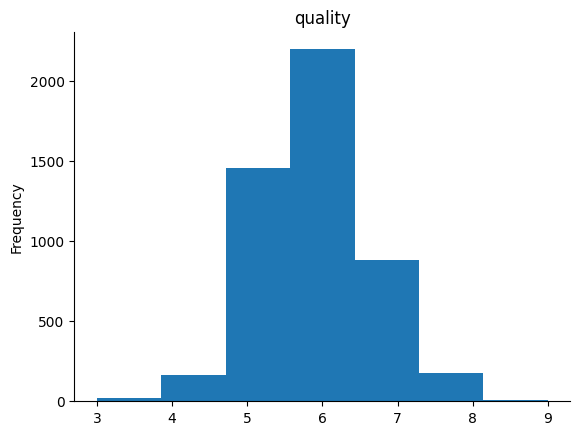

In [5]:
from matplotlib import pyplot as plt
df_white['quality'].plot(kind='hist', bins=7, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality123            4898 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 497.6 KB


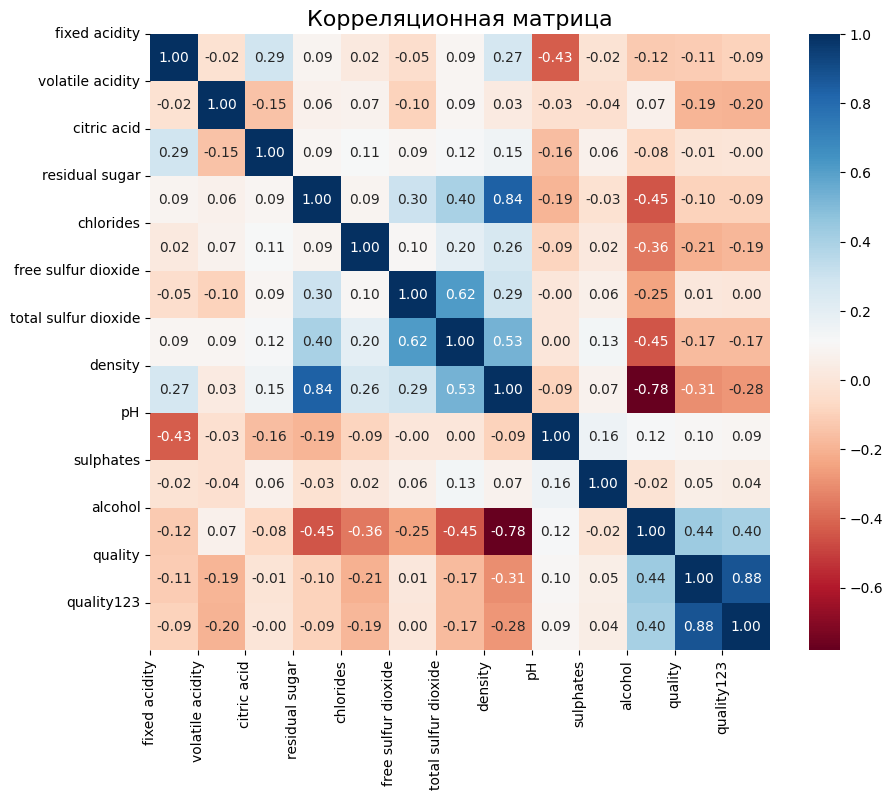

In [7]:
correlation_matrix(df_white)

In [8]:
top_correlations(df_white, 20)

1. quality AND quality123: 0.88
2. residual sugar AND density: 0.84
3. density AND alcohol: -0.78
4. free sulfur dioxide AND total sulfur dioxide: 0.62
5. total sulfur dioxide AND density: 0.53
6. residual sugar AND alcohol: -0.45
7. total sulfur dioxide AND alcohol: -0.45
8. alcohol AND quality: 0.44
9. fixed acidity AND pH: -0.43
10. alcohol AND quality123: 0.40
11. residual sugar AND total sulfur dioxide: 0.40
12. chlorides AND alcohol: -0.36
13. density AND quality: -0.31
14. residual sugar AND free sulfur dioxide: 0.30
15. free sulfur dioxide AND density: 0.29
16. fixed acidity AND citric acid: 0.29
17. density AND quality123: -0.28
18. fixed acidity AND density: 0.27
19. chlorides AND density: 0.26
20. free sulfur dioxide AND alcohol: -0.25


In [9]:
top_correlations_to_parametr(df_white, 20, 11)

1. quality123 AND quality: 0.88
2. alcohol AND quality: 0.44
3. density AND quality: -0.31
4. chlorides AND quality: -0.21
5. volatile acidity AND quality: -0.19
6. total sulfur dioxide AND quality: -0.17
7. fixed acidity AND quality: -0.11
8. pH AND quality: 0.10
9. residual sugar AND quality: -0.10
10. sulphates AND quality: 0.05
11. citric acid AND quality: -0.01
12. free sulfur dioxide AND quality: 0.01


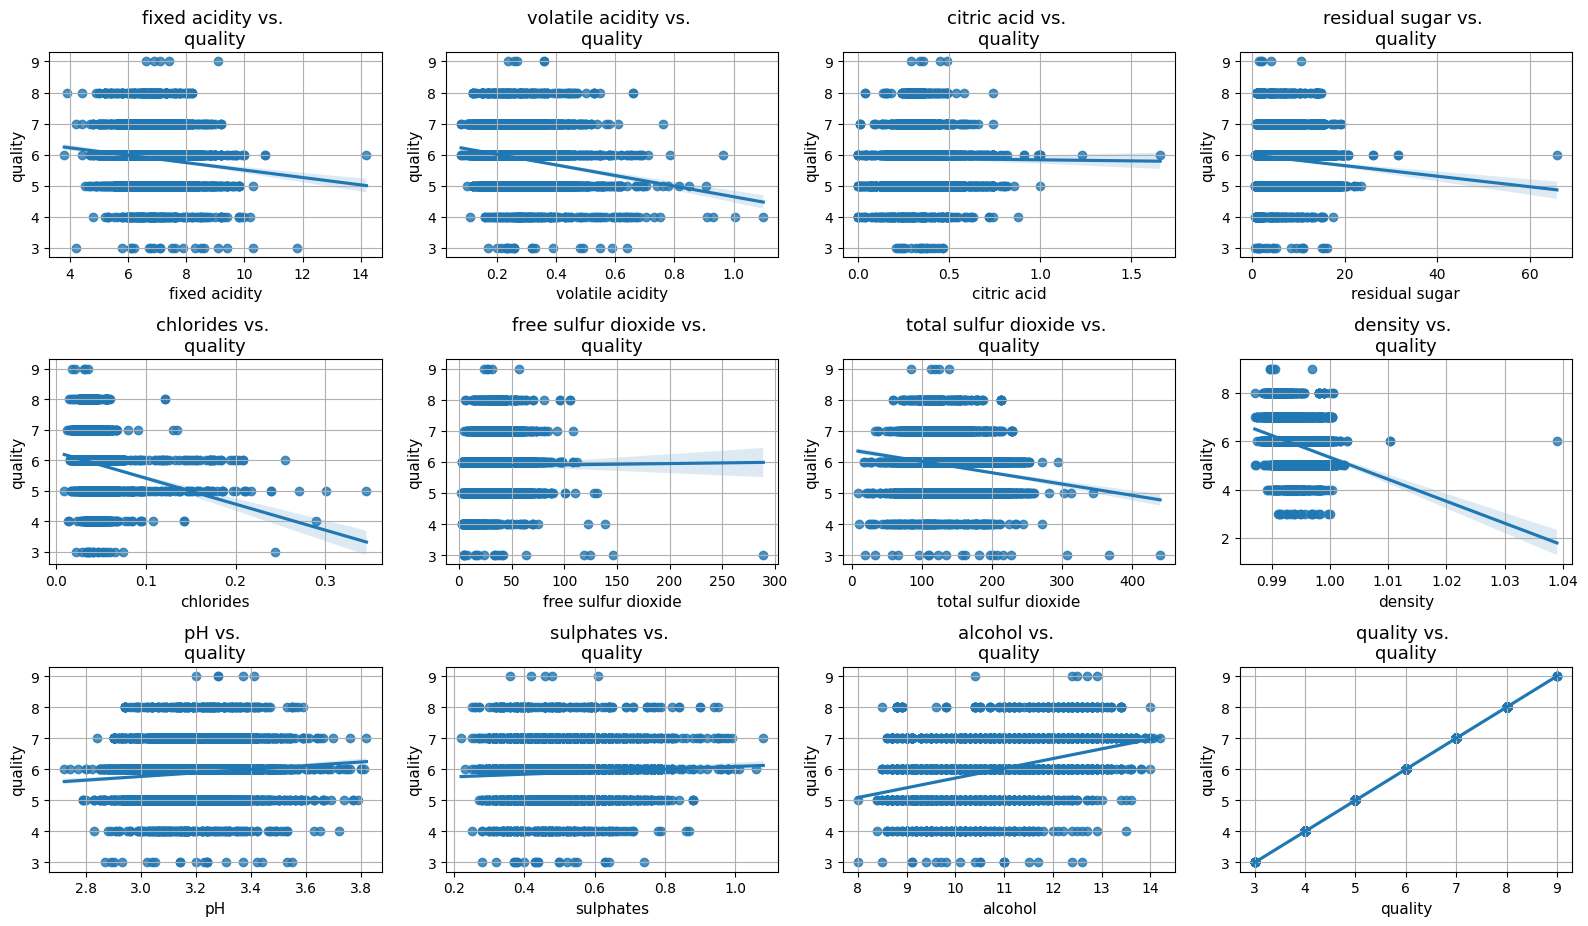

In [10]:
compare_plots_to_parametr_row(df_white, 11)

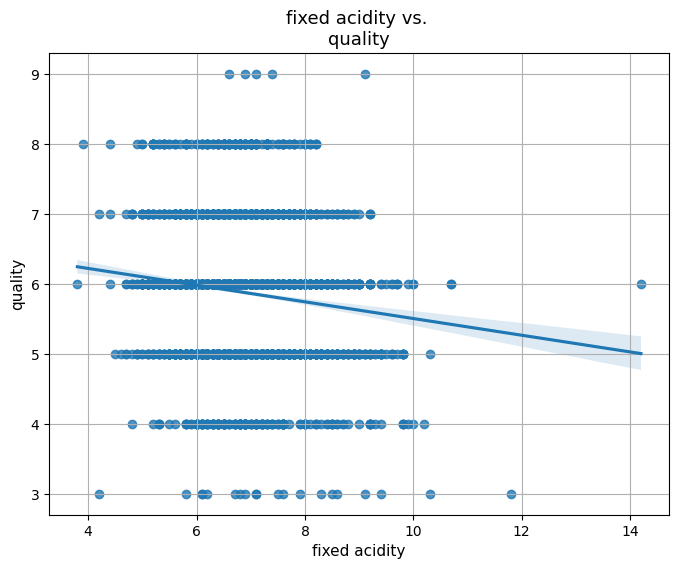

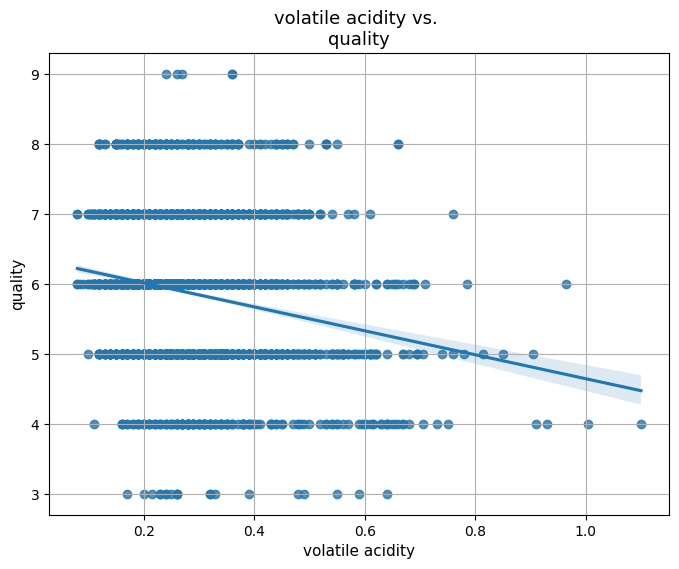

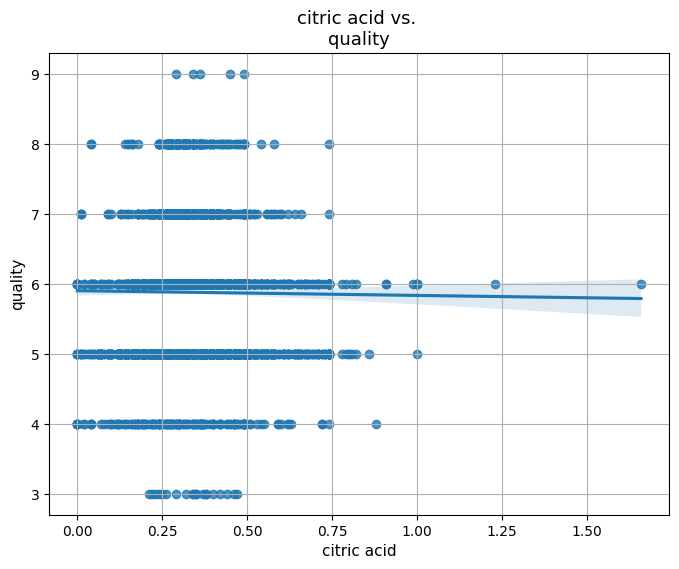

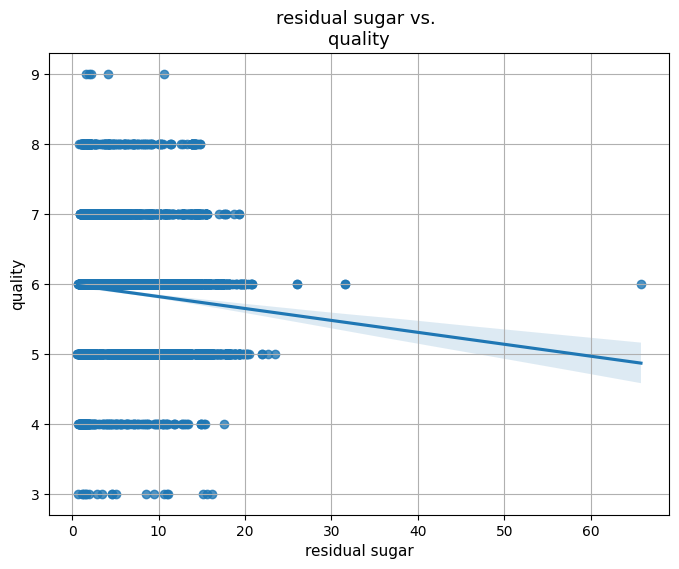

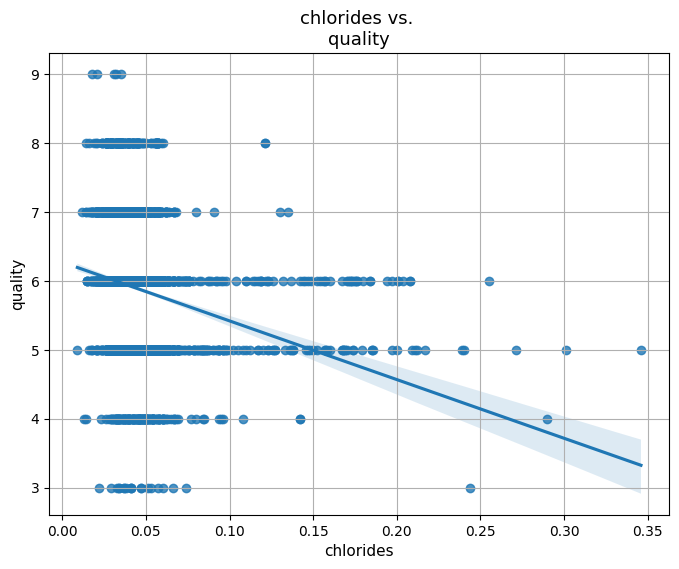

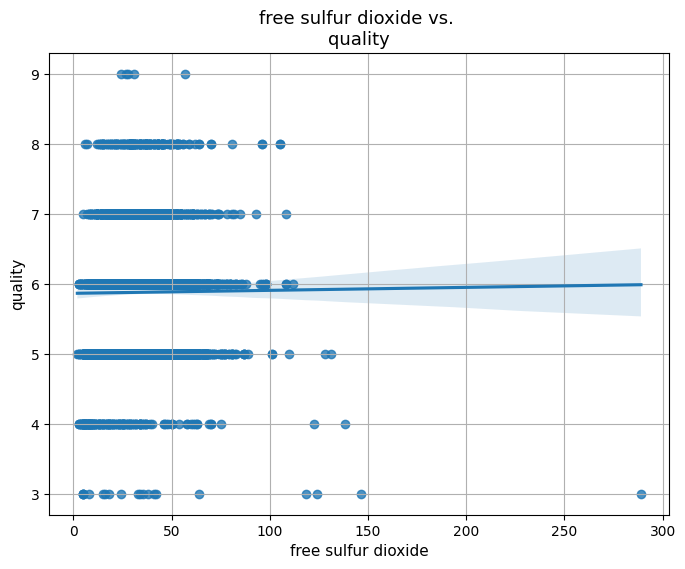

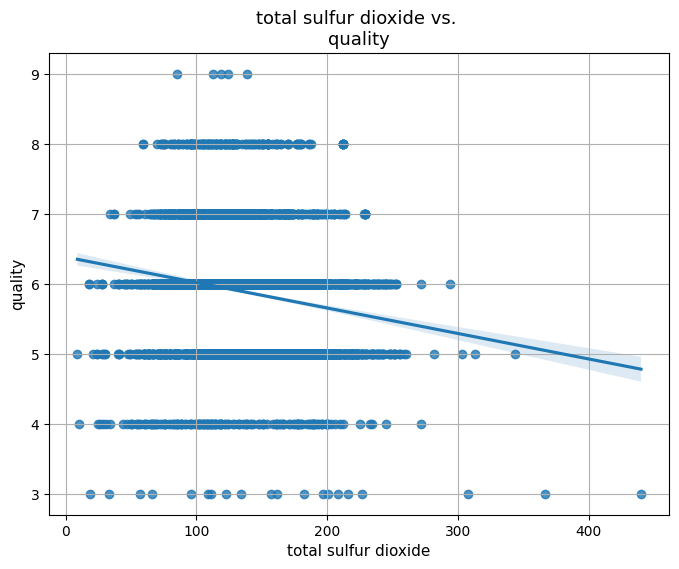

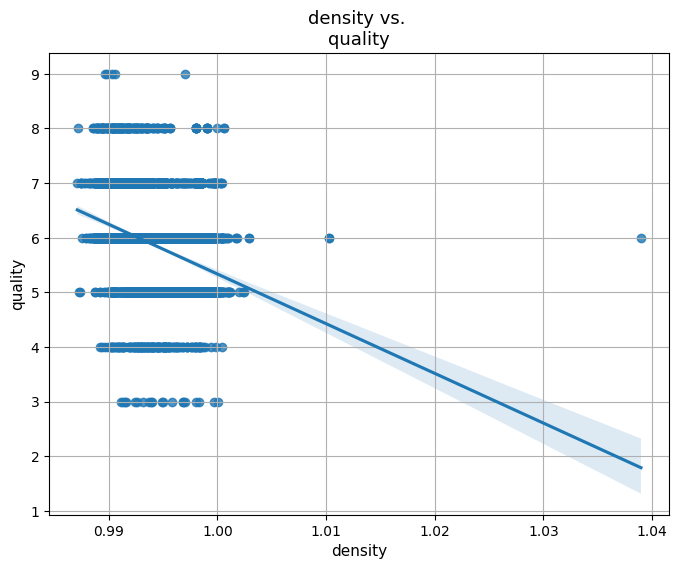

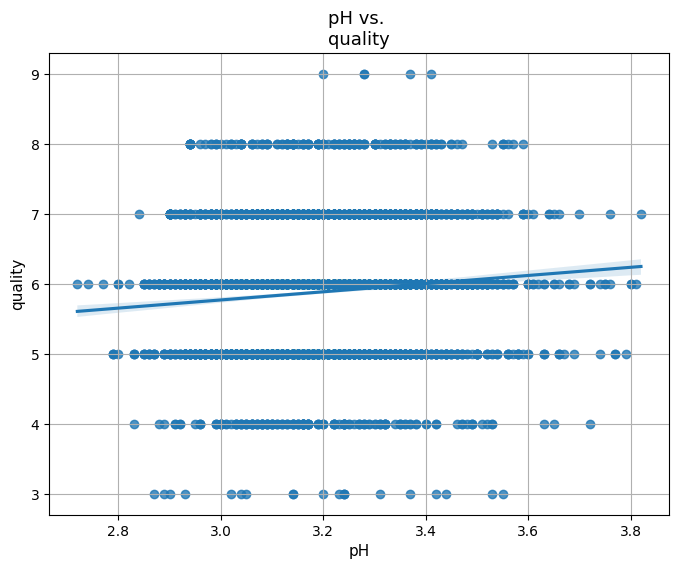

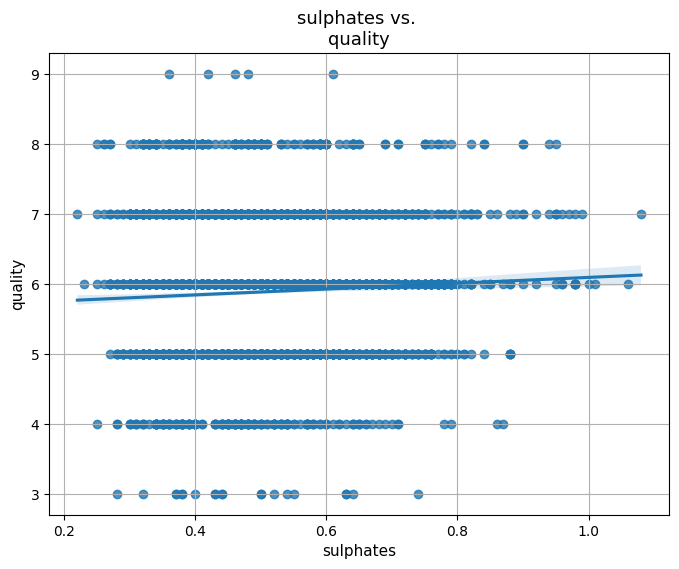

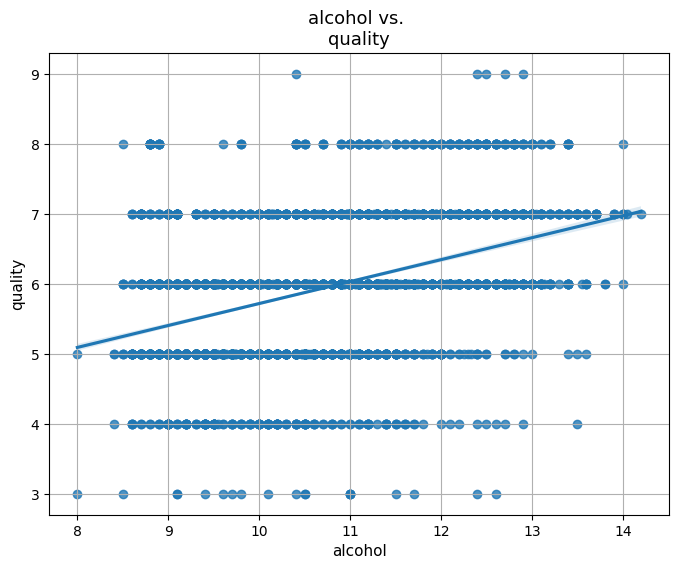

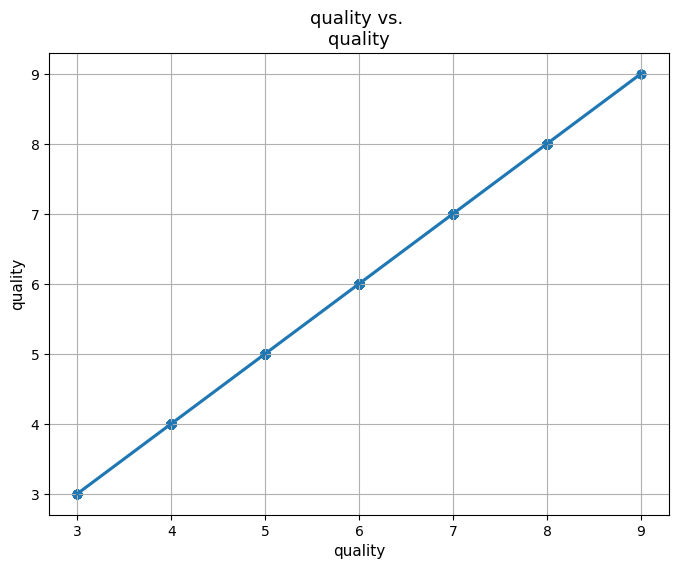

In [11]:
compare_plots_to_parametr(df_white, 11)

In [12]:
av_quality = df_white.iloc[:, 11].values
sum(av_quality) / len(av_quality)

5.87790935075541

In [13]:
X_white = df_white.iloc[:, [0, 1, 2, 4, 6, 7, 8, 10]].values
y_white = df_white.iloc[:, 11].values
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, train_size=0.8, random_state=10)
scaler = StandardScaler()
X_white_train = scaler.fit_transform(X_white_train)
X_white_test = scaler.fit_transform(X_white_test)

In [14]:
# @title rounded LinearRegression

model_white_lr = LinearRegression()
model_white_lr.fit(X_white_train, y_white_train)
i = 0
y_pred_white_linear = []
for _ in range(len(X_white_test)):
    y_pred_white_linear_temp = model_white_lr.predict(X_white_test)[i]
    y_pred_white_linear_temp = int(round(y_pred_white_linear_temp, 0))
    y_pred_white_linear.append(y_pred_white_linear_temp)
    i += 1
y_pred_white_linear = np.array(y_pred_white_linear)

try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_linear)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_linear)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_linear)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_linear)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_linear)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.5163265306122449
MSE: 0.6551020408163265
MAE: 0.5387755102040817
f1: Error
Log Cosh Loss: Error


In [15]:
# @title rounded Lasso

model = Lasso()
model.fit(X_white_train, y_white_train)
i = 0
y_pred_white_lasso = []
for _ in range(len(X_white_test)):
    y_pred_white_lasso_temp = model.predict(X_white_test)[i]
    y_pred_white_lasso_temp = int(round(y_pred_white_lasso_temp, 0))
    y_pred_white_lasso.append(y_pred_white_lasso_temp)
    i += 1
y_pred_white_lasso = np.array(y_pred_white_lasso)
try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_lasso)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_lasso)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_lasso)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_lasso)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_ridge)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.45918367346938777
MSE: 0.7704081632653061
MAE: 0.6153061224489796
f1: Error
Log Cosh Loss: Error


In [16]:
# @title rounded Ridge

model = Ridge()
model.fit(X_white_train, y_white_train)
i = 0
y_pred_white_ridge = []
for _ in range(len(X_white_test)):
    y_pred_white_ridge_temp = model.predict(X_white_test)[i]
    y_pred_white_ridge_temp = int(round(y_pred_white_ridge_temp, 0))
    y_pred_white_ridge.append(y_pred_white_ridge_temp)
    i += 1
y_pred_white_ridge = np.array(y_pred_white_ridge)
try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_ridge)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_ridge)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_ridge)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_ridge)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_ridge)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.5163265306122449
MSE: 0.6551020408163265
MAE: 0.5387755102040817
f1: Error
Log Cosh Loss: Error


In [17]:
# @title kernel='linear'

model = SVC(kernel='linear')
model.fit(X_white_train, y_white_train)
y_pred_white_SVClinear = model.predict(X_white_test)
try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_SVClinear)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_SVClinear)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_SVClinear)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_SVClinear)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_SVClinear)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.5153061224489796
MSE: 0.6969387755102041
MAE: 0.55
f1: Error
Log Cosh Loss: Error


In [18]:
# @title kernel='poly'

model = SVC(kernel='poly', degree=2, gamma=1)
model.fit(X_white_train, y_white_train)
y_pred_white_poly = model.predict(X_white_test)
try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_poly)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_poly)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_poly)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_poly)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_poly)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.4959183673469388
MSE: 0.6938775510204082
MAE: 0.5653061224489796
f1: Error
Log Cosh Loss: Error


In [19]:
# @title kernel='rbf'

model = SVC(kernel='rbf', C=10, gamma=10)
model.fit(X_white_train, y_white_train)
y_pred_white_rbf = model.predict(X_white_test)
try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_rbf)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_rbf)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_rbf)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_rbf)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_rbf)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.6520408163265307
MSE: 0.5102040816326531
MAE: 0.4
f1: Error
Log Cosh Loss: Error


In [20]:
# @title kernel='rbf' settings

svc = SVC(kernel='rbf')

param_grid = {
    'gamma': np.logspace(-3, 2, 6),  # от 0.001 до 100
    'C': np.logspace(-3, 2, 6)
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4)
grid_search.fit(X_white_train, y_white_train)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшее значение кросс-валидации: ", grid_search.best_score_)

unique_values, counts = np.unique(y_pred_white_rbf, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print(f'y_pred: {value_counts}')

unique_values, counts = np.unique(y_white_test, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print(f'y_test: {value_counts}')

Лучшие параметры:  {'C': 10.0, 'gamma': 10.0}
Лучшее значение кросс-валидации:  0.601073044130829
y_pred: {4: 5, 5: 122, 6: 768, 7: 67, 8: 18}
y_test: {3: 2, 4: 29, 5: 280, 6: 450, 7: 180, 8: 38, 9: 1}


In [21]:
# @title kernel='sigmoid'

model = SVC(kernel='sigmoid')
model.fit(X_white_train, y_white_train)
y_pred_white_sigmoid = model.predict(X_white_test)
try:
    print(f'Accuracy: {accuracy_score(y_white_test, y_pred_white_sigmoid)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_white_test, y_pred_white_sigmoid)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_white_test, y_pred_white_sigmoid)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_white_test, y_pred_white_sigmoid)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_white_test, y_pred_white_sigmoid)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.4204081632653061
MSE: 1.063265306122449
MAE: 0.7244897959183674
f1: Error
Log Cosh Loss: Error


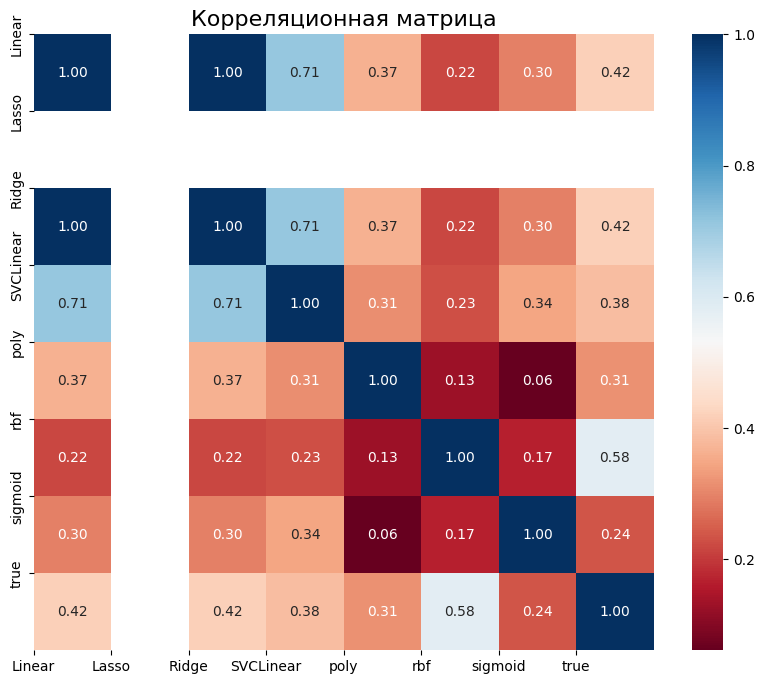

In [41]:
y_pred_white = pd.DataFrame({
    'Linear': y_pred_white_linear,
    'Lasso': y_pred_white_lasso,
    'Ridge': y_pred_white_ridge,
    'SVCLinear': y_pred_white_SVClinear,
    'poly': y_pred_white_poly,
    'rbf': y_pred_white_rbf,
    'sigmoid': y_pred_white_sigmoid,
    'true': y_white_test
})

correlation_matrix(y_pred_white)

# ДАТАСЕТ ПО КРАСНОМУ ВИНУ

In [23]:
df_red = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep=';')
df_red.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


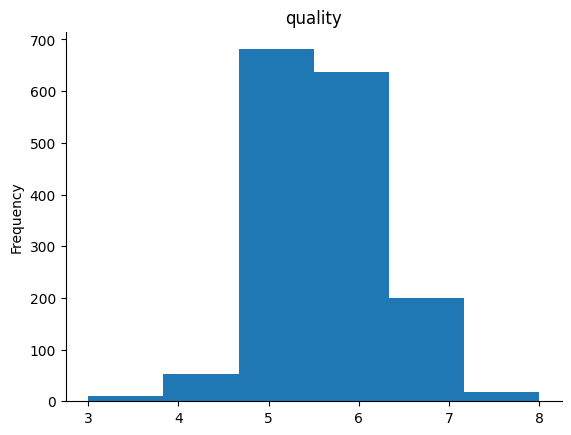

In [24]:
from matplotlib import pyplot as plt
df_red['quality'].plot(kind='hist', bins=6, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


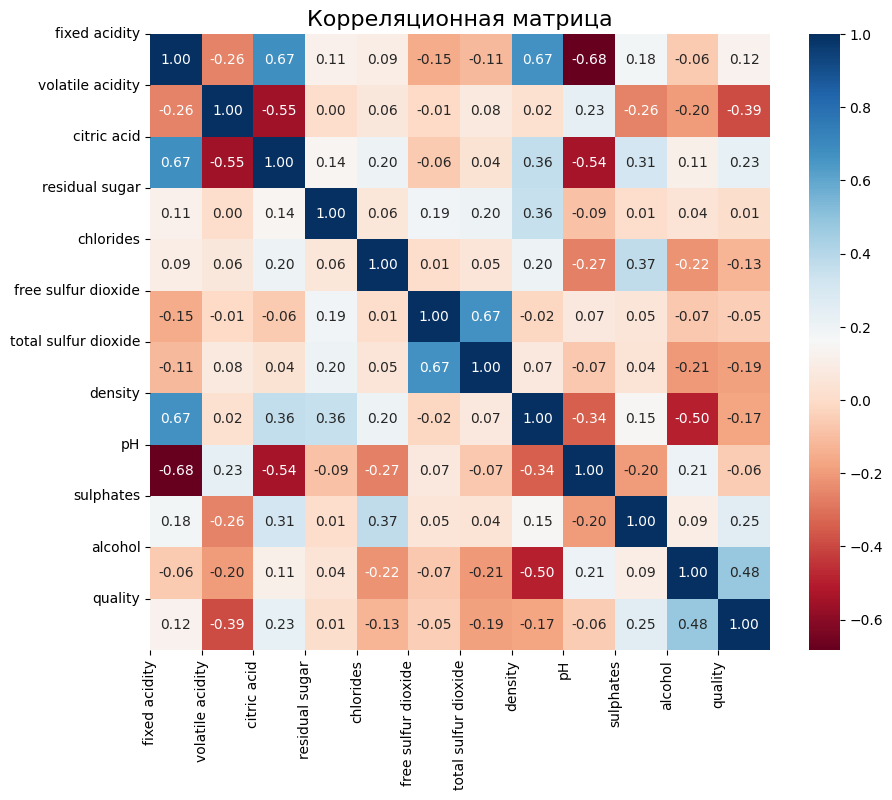

In [26]:
correlation_matrix(df_red)

In [27]:
top_correlations(df_red, 20)

1. fixed acidity AND pH: -0.68
2. fixed acidity AND citric acid: 0.67
3. fixed acidity AND density: 0.67
4. free sulfur dioxide AND total sulfur dioxide: 0.67
5. volatile acidity AND citric acid: -0.55
6. citric acid AND pH: -0.54
7. density AND alcohol: -0.50
8. alcohol AND quality: 0.48
9. volatile acidity AND quality: -0.39
10. chlorides AND sulphates: 0.37
11. citric acid AND density: 0.36
12. residual sugar AND density: 0.36
13. density AND pH: -0.34
14. citric acid AND sulphates: 0.31
15. chlorides AND pH: -0.27
16. volatile acidity AND sulphates: -0.26
17. fixed acidity AND volatile acidity: -0.26
18. sulphates AND quality: 0.25
19. volatile acidity AND pH: 0.23
20. citric acid AND quality: 0.23


In [28]:
top_correlations_to_parametr(df_red, 20, 11)

1. alcohol AND quality: 0.48
2. volatile acidity AND quality: -0.39
3. sulphates AND quality: 0.25
4. citric acid AND quality: 0.23
5. total sulfur dioxide AND quality: -0.19
6. density AND quality: -0.17
7. chlorides AND quality: -0.13
8. fixed acidity AND quality: 0.12
9. pH AND quality: -0.06
10. free sulfur dioxide AND quality: -0.05
11. residual sugar AND quality: 0.01


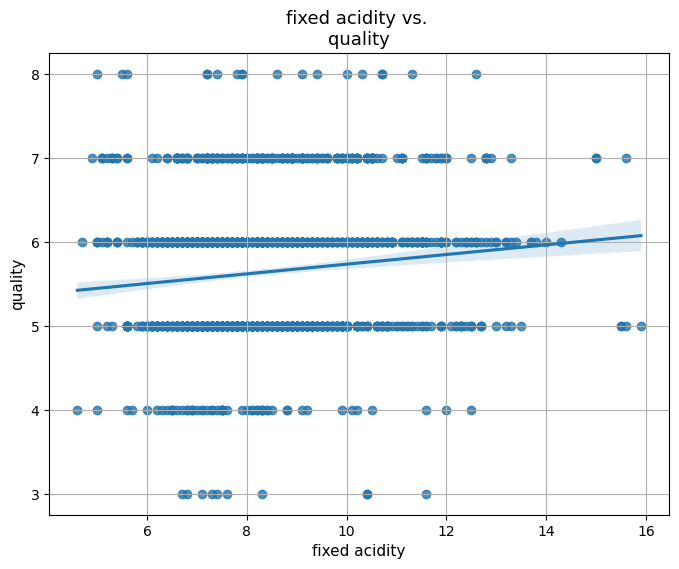

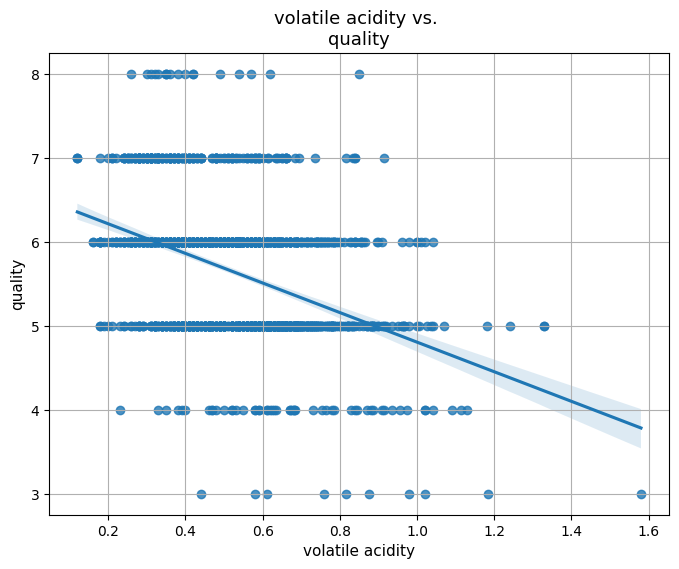

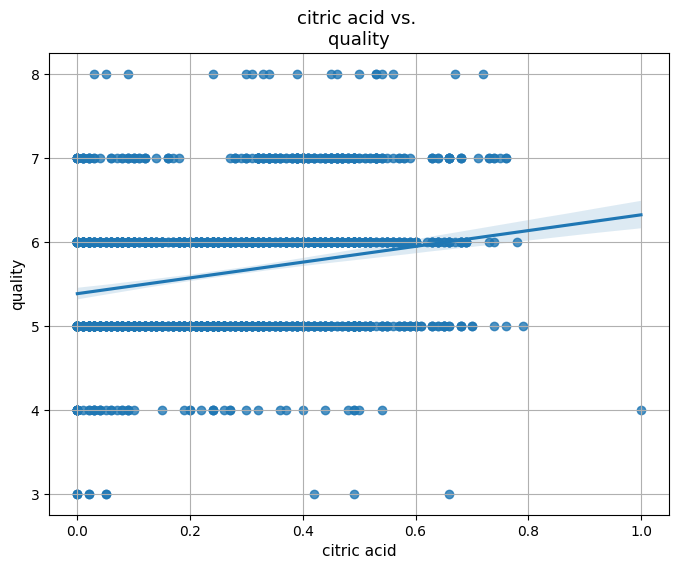

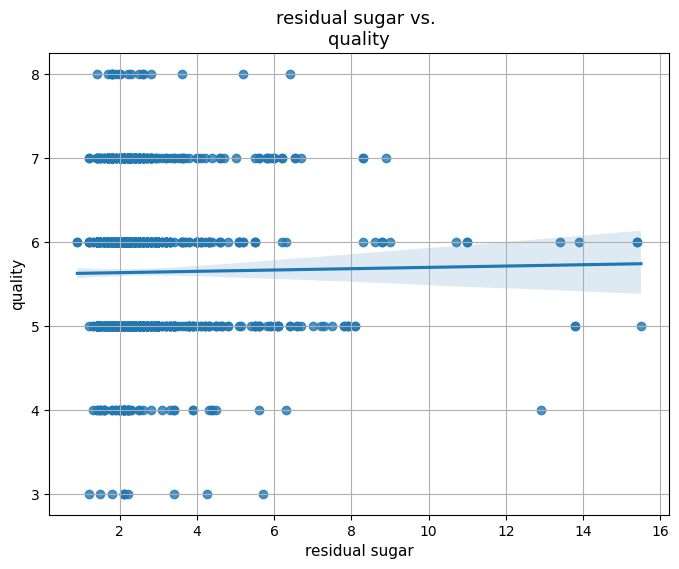

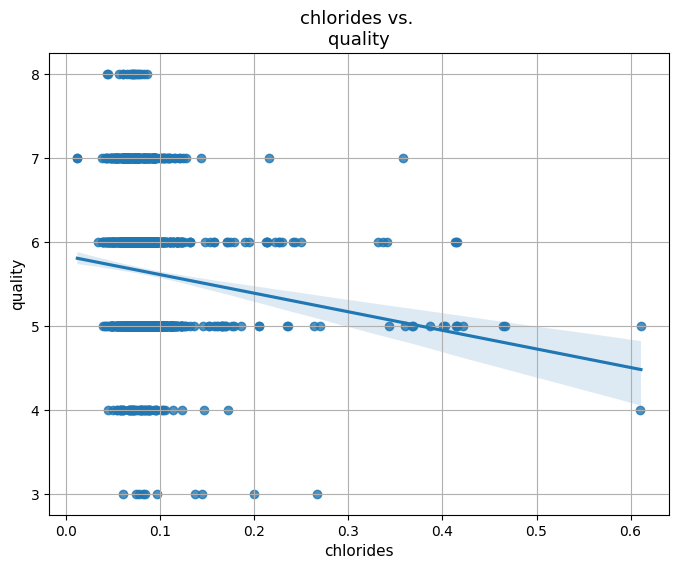

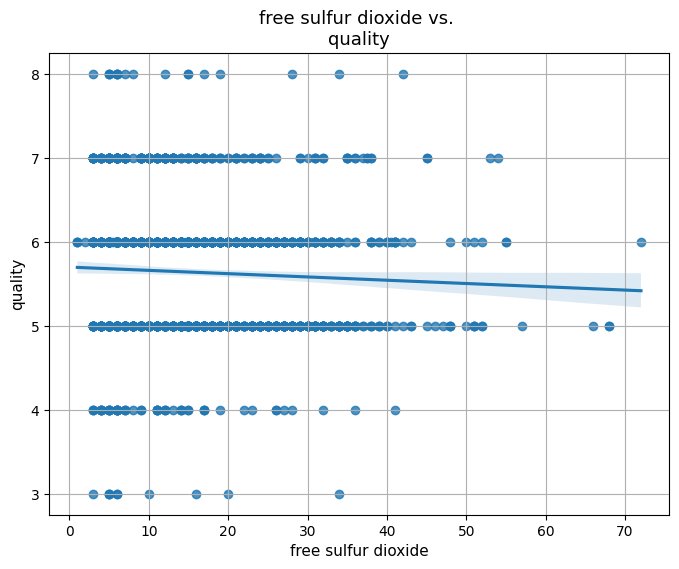

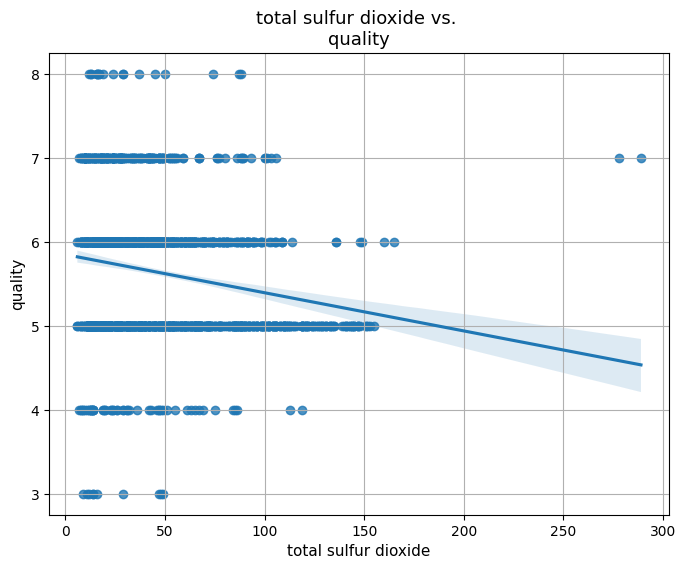

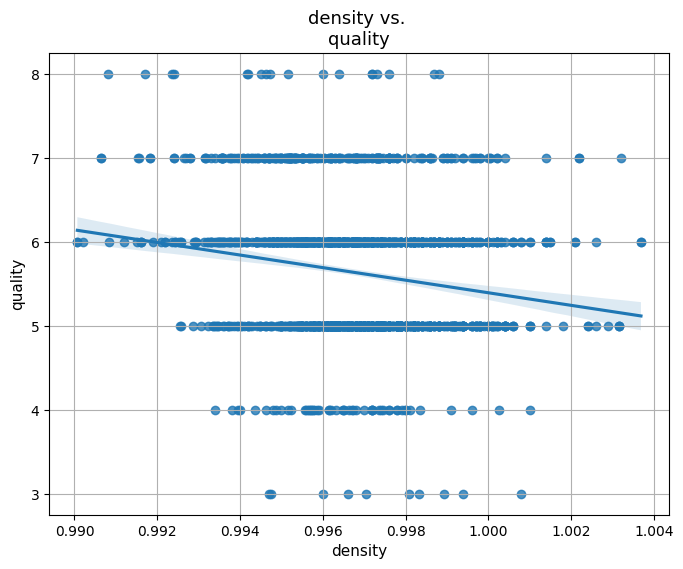

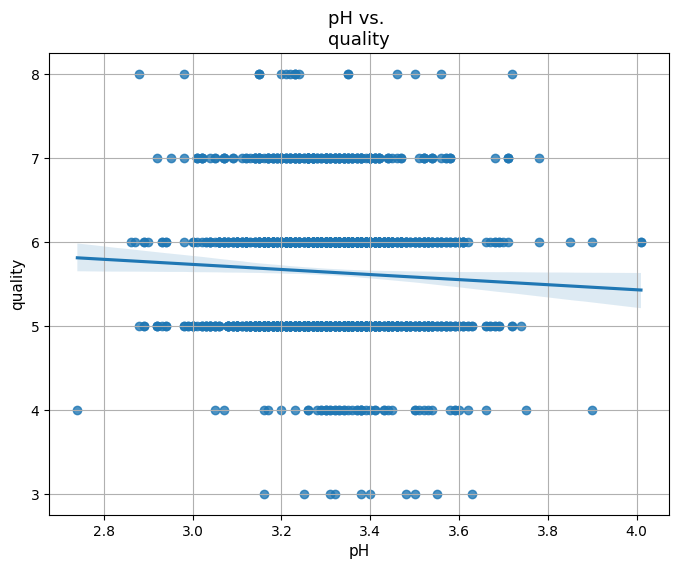

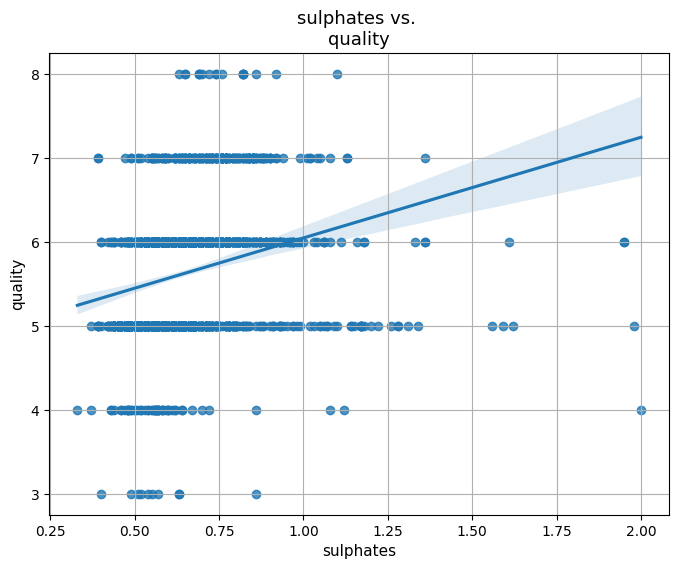

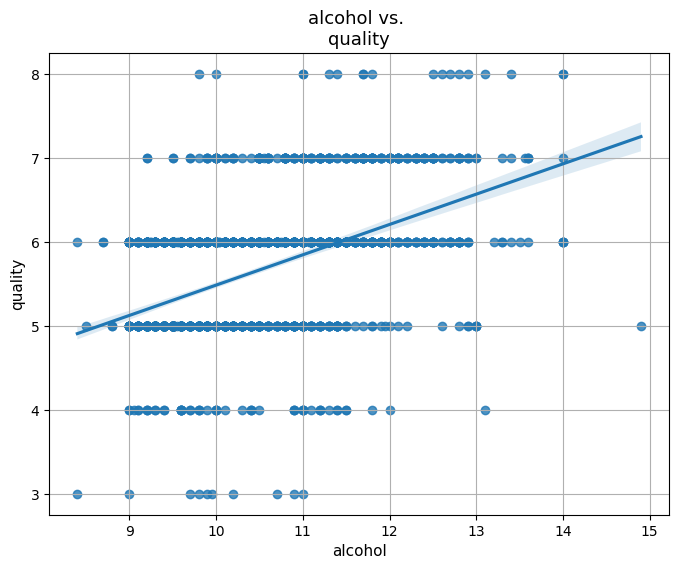

In [29]:
compare_plots_to_parametr(df_red, 11)

In [30]:
av_quality = df_red.iloc[:, 11].values
sum(av_quality) / len(av_quality)

5.6360225140712945

In [31]:
X_red = df_red.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].values
y_red = df_red.iloc[:, 11].values
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, train_size=0.8, random_state=20)

In [32]:
# @title rounded LinearRegression

model = LinearRegression()
model.fit(X_red_train, y_red_train)
i = 0
y_pred_red_linear = []
for _ in range(len(X_red_test)):
    y_pred_red_linear_temp = model.predict(X_red_test)[i]
    y_pred_red_linear_temp = int(round(y_pred_red_linear_temp, 0))
    y_pred_red_linear.append(y_pred_red_linear_temp)
    i += 1
y_pred_red_linear = np.array(y_pred_red_linear)

try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_linear)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_linear)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_linear)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_linear)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_linear)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.609375
MSE: 0.490625
MAE: 0.421875
f1: Error
Log Cosh Loss: Error


In [33]:
# @title rounded Lasso

model = Lasso()
model.fit(X_red_train, y_red_train)
i = 0
y_pred_red_lasso = []
for _ in range(len(X_red_test)):
    y_pred_red_lasso_temp = model.predict(X_red_test)[i]
    y_pred_red_lasso_temp = int(round(y_pred_red_lasso_temp, 0))
    y_pred_red_lasso.append(y_pred_red_lasso_temp)
    i += 1
y_pred_red_lasso = np.array(y_pred_red_lasso)
try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_lasso)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_lasso)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_lasso)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_lasso)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_lasso)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.484375
MSE: 0.6625
MAE: 0.5625
f1: Error
Log Cosh Loss: Error


In [34]:
# @title rounded Ridge

model = Ridge()
model.fit(X_red_train, y_red_train)
i = 0
y_pred_red_ridge = []
for _ in range(len(X_red_test)):
    y_pred_red_ridge_temp = model.predict(X_red_test)[i]
    y_pred_red_ridge_temp = int(round(y_pred_red_ridge_temp, 0))
    y_pred_red_ridge.append(y_pred_red_ridge_temp)
    i += 1
y_pred_red_ridge = np.array(y_pred_red_ridge)
try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_ridge)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_ridge)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_ridge)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_ridge)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_ridge)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.60625
MSE: 0.484375
MAE: 0.421875
f1: Error
Log Cosh Loss: Error


In [35]:
# @title kernel='linear'

model = SVC(kernel='linear')
model.fit(X_red_train, y_red_train)
y_pred_red_SVClinear = model.predict(X_red_test)
try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_SVClinear)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_SVClinear)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_SVClinear)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_SVClinear)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_SVClinear)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.58125
MSE: 0.484375
MAE: 0.440625
f1: Error
Log Cosh Loss: Error


In [36]:
# @title kernel='poly'

model = SVC(kernel='poly')
model.fit(X_red_train, y_red_train)
y_pred_red_poly = model.predict(X_red_test)
try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_poly)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_poly)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_poly)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_poly)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_poly)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.4875
MSE: 0.640625
MAE: 0.553125
f1: Error
Log Cosh Loss: Error


In [37]:
# @title kernel='rbf'

model = SVC(kernel='rbf')
model.fit(X_red_train, y_red_train)
y_pred_red_rbf = model.predict(X_red_test)
try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_rbf)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_rbf)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_rbf)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_rbf)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_rbf)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.503125
MSE: 0.653125
MAE: 0.546875
f1: Error
Log Cosh Loss: Error


In [38]:
# @title kernel='sigmoid'

model = SVC(kernel='sigmoid')
model.fit(X_red_train, y_red_train)
y_pred_red_sigmoid = model.predict(X_red_test)
try:
    print(f'Accuracy: {accuracy_score(y_red_test, y_pred_red_sigmoid)}')
except:
    print(f'Accuracy: Error')

try:
    print(f'MSE: {mean_squared_error(y_red_test, y_pred_red_sigmoid)}')
except:
    print(f'MSE: Error')

try:
    print(f'MAE: {mean_absolute_error(y_red_test, y_pred_red_sigmoid)}')
except:
    print(f'MAE: Error')

try:
    print(f'f1: {f1_score(y_red_test, y_pred_red_sigmoid)}')
except:
    print(f'f1: Error')

try:
    print(f'Log Cosh Loss: {log_loss(y_red_test, y_pred_red_sigmoid)}')
except:
    print(f'Log Cosh Loss: Error')

Accuracy: 0.46875
MSE: 0.925
MAE: 0.65
f1: Error
Log Cosh Loss: Error


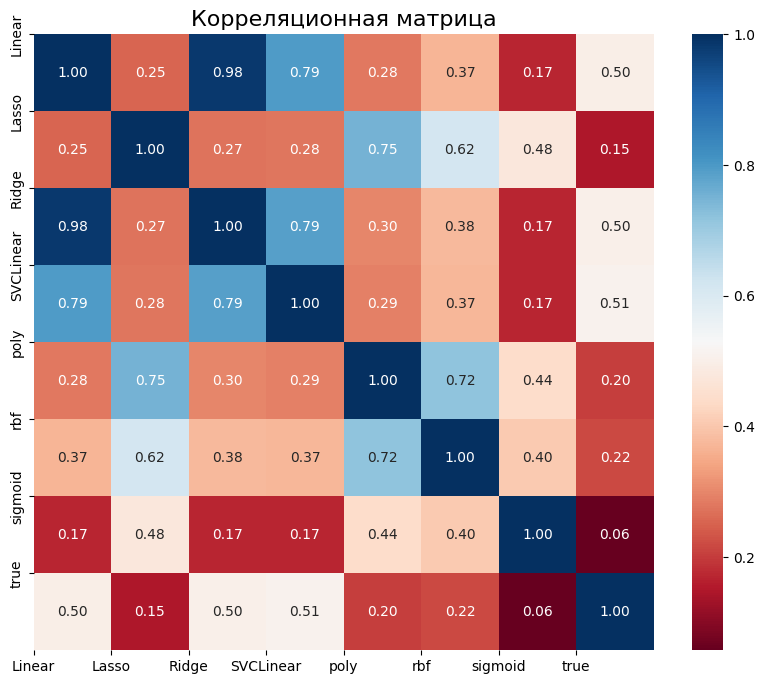

In [39]:
y_pred_red = pd.DataFrame({
    'Linear': y_pred_red_linear,
    'Lasso': y_pred_red_lasso,
    'Ridge': y_pred_red_ridge,
    'SVCLinear': y_pred_red_SVClinear,
    'poly': y_pred_red_poly,
    'rbf': y_pred_red_rbf,
    'sigmoid': y_pred_red_sigmoid,
    'true': y_red_test
})

correlation_matrix(y_pred_red)